# Create a scatter matrix

Here, we will create a scatter matrix to compare all the features with each other

In [1]:
import matplotlib.pyplot as plt

import catalog
import matrix

catalog.display_parameters()

## Load the features of the avalanches (fd)

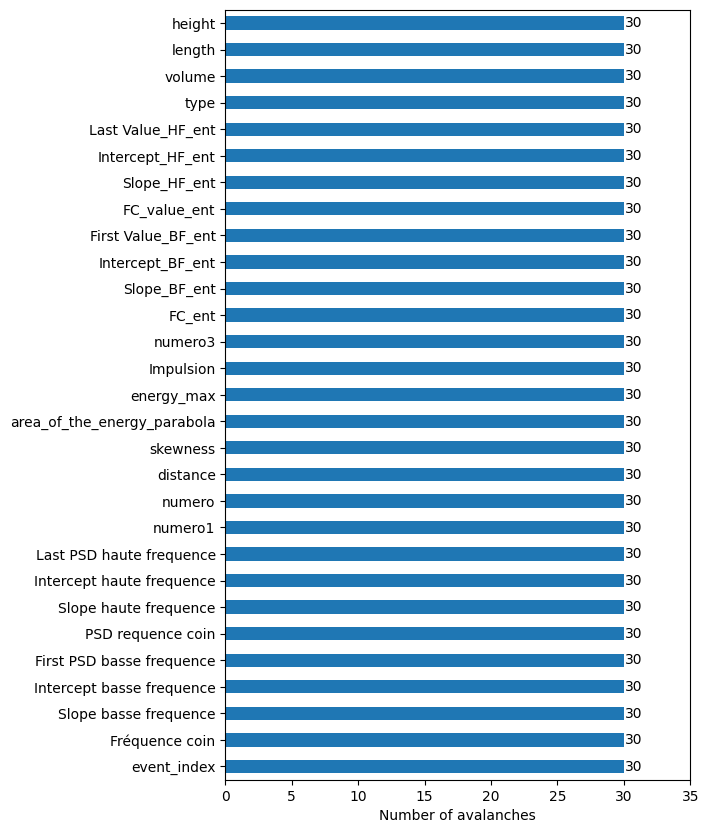

In [2]:
fd = catalog.load("catalog/10_features_dataframe.pickle")

catalog.open_plot(fd, pos_number=0.15, xlim=35)

In [3]:
## Remove all unnecessary features (or features that are not linked to anything)
fd = fd.drop(columns=['numero1'])
fd = fd.drop(columns=['numero'])
fd = fd.drop(columns=['numero3'])
fd = fd.drop(columns=['event_index'])
fd = fd.drop(columns=['distance'])
fd = fd.drop(columns=['type'])
fd = fd.drop(columns=['Impulsion'])
fd = fd.drop(columns=['Intercept basse frequence'])
fd = fd.drop(columns=['Intercept haute frequence'])
fd = fd.drop(columns=['Intercept_BF_ent'])
fd = fd.drop(columns=['Intercept_HF_ent'])
fd = fd.drop(columns=['PSD requence coin'])
fd = fd.drop(columns=['Last PSD haute frequence'])
fd = fd.drop(columns=['Last Value_HF_ent'])

## Generate the scatter matrix

In [4]:
## Here, the scatter matrix will be generated automatically

## Initialize lists to store the results
columns = []
X = []
Y = []

## Loop through each column in the DataFrame
for column in fd.columns:
    columns.append(fd[column]) ## Store the column data
    X.append(column)           ## Store the column name for X
    Y.append(column)           ## Store the column name for Y

X = X[:-1]          ## Keep all elements but remove the last for X
Y = Y[1:]           ## Keep all elements but remove the last for Y
X_label = len(X)+1  ## Length of X plus 1
Y_label = len(Y)+1  ## Length of Y plus 1

In [5]:
## Fontsize of the labels
fontsize = 20

fig, axs = plt.subplots(X_label, Y_label, figsize=(60, 60), dpi=300)

matrix.remove_fig(fig, axs)                                     ## Remove all the figures not used
matrix.remove_ticks(X_label, Y_label, axs)                      ## Remove all the ticks not used
matrix.label_size(X_label, Y_label, axs, labelsize=13)          ## Adjust the size of the labels
matrix.labels_scatter(X, Y, X_label, Y_label, axs, fontsize=17) ## Add labels

## Plot the histograms
for i in range(len(columns)):
    ## Flip the last histogram and exit the loop
    if i == len(columns) - 1:
        matrix.histogram_flip(columns[-1], axs=axs[X_label-1, Y_label-1], fontsize=fontsize)
        break

    ## Plot log histogram if needed
    log_scale = (i in [2, 5, 6, 12]) 
    if log_scale:
        matrix.histogram(columns[i], axs=axs[i, i], bin=10, fontsize=fontsize) ## Logarithmic histogram
    else:
        matrix.histogram_normal(columns[i], axs=axs[i, i], fontsize=fontsize)  ## Normal histogram

## Plot the features
matrix.plot_results(columns, axs) 

## Set somes axis in log
matrix.set_axe_log(axs, X_label, y_log_rows=[2, 5, 6, 12], x_log_cols=[0, 2, 5, 6, 12])

plt.subplots_adjust(wspace=0.01, hspace=0.01)
plt.savefig("figures/scatter_matrix_finale.pdf")
plt.show()